In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy.stats.stats import pearsonr

reading the data set to python environment

In [2]:
df = pd.read_csv("car_age_price.csv")

 looking at values inside the data

In [3]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


#### Checking for null/missing values

In [4]:
df.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [6]:
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


#### Plot boxplot to find if there are any potential outliers

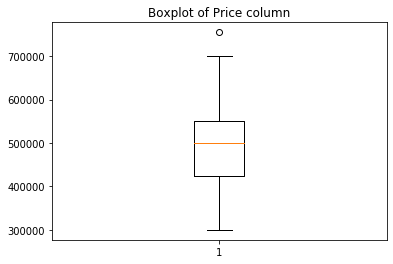

In [7]:
plt.boxplot(df['Price'])
plt.title('Boxplot of Price column')
plt.show()

In [8]:
df[df['Price']>700000]

,Year,Price
1,2019,755000


In [9]:
### Not removing the outlier because it is useful, it shows that price in 2019 is increasing

#### Finding best fit line for Price and Year

In [10]:
x = df['Year']
y = df['Price']
m, b = np.polyfit(x, y, 1)

In [11]:
print(m)

43453.37988792696


In [12]:
print(b)

-87147246.05487856


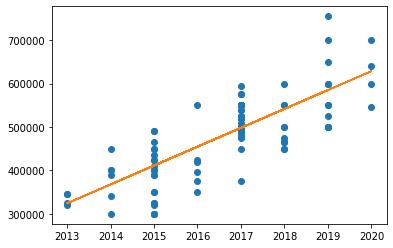

In [13]:
plt.plot(x, y, 'o')
#create scatter plot

plt.plot(x, m*x + b)

In [14]:
print('y = mx + b')
print('y =', m,'*x +', b)

y = mx + b
y = 43453.37988792696 *x + -87147246.05487856


#### Predicting possible price of a 2022 model second-hand grand i10 from best fit line
#### Price in 2022 would be : 715488.078509748

In [15]:
y = m*2022 + b
y

715488.078509748

#### Plotting the Correlation Matrix of Year and Price

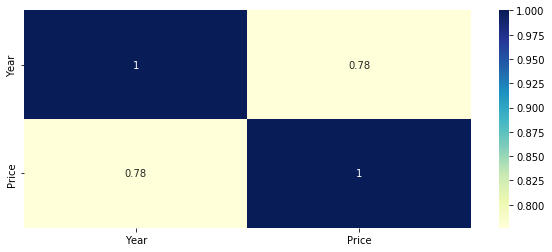

In [16]:
corrmatrix = df.corr()
plt.subplots(figsize=(10, 4))
sns.heatmap(corrmatrix, annot=True, cmap="YlGnBu")

#### Finding Pearsonr Correlation Coefficient of year and price

In [17]:
pearsonr_coefficient, p_value =pearsonr(df['Year'],df['Price'])
print("PearsonR correlation coefficient %0.3f"% (pearsonr_coefficient))

PearsonR correlation coefficient 0.776


#### Importing different Libraries required for the training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

#### Splitting data to target and feature
here Price is the target and year is the feature

In [19]:
X = df.drop(['Price'], axis =1)
y = df['Price']

#### Splitting into test data and train data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### Performing Linear Regression

In [21]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

#### Finding Mean Squared and R Squared error of the linear regression model

In [22]:
print('Mean squared error is:', mean_squared_error(y_test, predictions))
print('R squared error is:', r2_score(y_test, predictions))

Mean squared error is: 4326906256.829671
R squared error is: 0.36759313425902185


#### Predicting the possible price of i10 in the year 2022 Linear Regression model

#### Price in 2022 would be 743601.61594504

In [23]:
year = [2022]
year = pd.DataFrame(year, columns=['Year'])
prediction = model.predict(year)
prediction

array([743601.61594504])

#### Lasso Regression model

In [24]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [25]:
predictions = lasso.predict(X_test)

#### Calculating Mean Squared Error of Lasso Regression model

In [26]:

# Calculate Mean Squared Error
mean_squared_error = np.mean((predictions - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
 
print(lasso_coeff)

Mean squared error on test set 4326859771.015669
  Columns  Coefficient Estimate
0    Year            47608.1556


#### Predicting price of i10 in the year using Lasso Regression model
#### Price in year 2022 would be: 743599.37427144

In [27]:
year = [2022]
year = pd.DataFrame(year, columns=['Year'])

In [28]:
prediction = lasso.predict(year)

In [29]:
prediction

array([743599.37427144])

##### Mean Squared Error of Linear Regression model:4326906256.829671.
##### Mean Squared Error of Lasso Regression model:4326859771.015669.
#### When considering MSE it should be as low as possible for a good ml model.
#### So here Lasso Regression Model is better than the Linear Regression model.

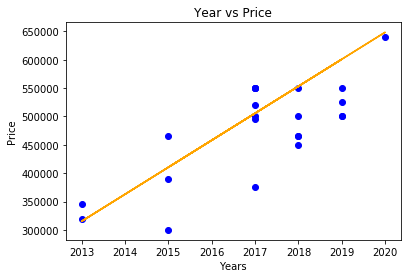

In [30]:
## Plotting Lasso Regression model
plt.scatter( X_test, y_test, color = 'blue' )
      
plt.plot( X_test, predictions, color = 'orange' )
      
plt.title( 'Year vs Price' )
      
plt.xlabel( 'Years' )
      
plt.ylabel( 'Price' )
      
plt.show()
